In [65]:
#Basic python library which need to import
import pandas as pd
import numpy as np
import math

#Date stuff
from datetime import datetime
from datetime import timedelta

#Library for graphing
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sn
%matplotlib inline

#Library for statistics operation
import scipy.stats as stats

# Date Time library
from datetime import datetime

In [66]:
# reading data into dataframe
credit= pd.read_csv("transaction.csv")

In [67]:

credit.head()

,customer_id,tran_id,tran_date,tran_amount,tran_description,card_type,isssuer_type,merchant_code,merchant_name,merchant_name_semicleaned,...,tran_type,tran_code,tran_flag,tran_category,category_code,behav_category,top90_flag,created_date,is_offer,behav_type
0,0012eda8-5722-4850-a43f-b0780f19216b,NaN,2019-06-16T00:00:00.000Z,118.33,NaN,NaN,NaN,NaN,Rice - Radisson Blu,Rice - Radisson Blu,...,NaN,NaN,NaN,dining,NaN,dining,yes,2019-11-11T15:06:27.036Z,0,taste
1,0012eda8-5722-4850-a43f-b0780f19216b,NaN,2019-06-04T00:00:00.000Z,110.42,NaN,NaN,NaN,NaN,Spring - Radisson Blu,Spring - Radisson Blu,...,NaN,NaN,NaN,dining,NaN,dining,yes,2019-11-11T15:06:27.036Z,0,taste
2,0012eda8-5722-4850-a43f-b0780f19216b,NaN,2019-11-15T00:00:00.000Z,107.92,NaN,NaN,NaN,NaN,Sampan The Suryaa,Sampan The Suryaa,...,NaN,NaN,NaN,dining,NaN,dining,no,2019-11-11T15:06:27.036Z,0,taste
3,0012eda8-5722-4850-a43f-b0780f19216b,NaN,2019-02-24T00:00:00.000Z,111.25,NaN,NaN,NaN,NaN,Urban Crave,Urban Crave,...,NaN,NaN,NaN,dining,NaN,dining,yes,2019-11-11T15:06:27.036Z,0,taste
4,0012eda8-5722-4850-a43f-b0780f19216b,NaN,2019-07-24T00:00:00.000Z,24.76,NaN,NaN,NaN,NaN,Frank Auto & Car Spa Centre,Frank Auto & Car Spa Centre,...,NaN,NaN,NaN,miscellaneous stores,NaN,miscellaneous stores,yes,2019-11-11T15:06:27.036Z,0,taste


In [68]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586585 entries, 0 to 586584
Data columns (total 34 columns):
customer_id                  586585 non-null object
tran_id                      0 non-null float64
tran_date                    586585 non-null object
tran_amount                  586585 non-null float64
tran_description             0 non-null float64
card_type                    0 non-null float64
isssuer_type                 0 non-null float64
merchant_code                0 non-null float64
merchant_name                586585 non-null object
merchant_name_semicleaned    586585 non-null object
merchant_name_new            586585 non-null object
merchant_country             586585 non-null object
merchant_city                586585 non-null object
masked_id                    0 non-null float64
customer_segment             0 non-null float64
product_id                   0 non-null float64
product_category             0 non-null float64
mcc_code                     586585 non-

In [69]:

# Find the total number of missing values in the dataframe
print ("\nMissing values :  ", credit.isnull().sum().values.sum())

# printing total numbers of Unique value in the dataframe. 
print ("\nUnique values :  \n",credit.nunique())


Missing values :   10558530

Unique values :  
 customer_id                  9000
tran_id                         0
tran_date                     356
tran_amount                  3041
tran_description                0
card_type                       0
isssuer_type                    0
merchant_code                   0
merchant_name                8816
merchant_name_semicleaned    8816
merchant_name_new            8536
merchant_country                1
merchant_city                 177
masked_id                       0
customer_segment                0
product_id                      0
product_category                0
mcc_code                      177
tran_terminal_id                0
tran_geocode                    0
card_id                      9000
points_earned                   0
points_used                     0
settlement_date                 0
tran_type                       0
tran_code                       0
tran_flag                       0
tran_category                   7

In [70]:
credit.shape

(586585, 34)

In [71]:
# Intital descriptive analysis of data.
credit.describe()

,tran_id,tran_amount,tran_description,card_type,isssuer_type,merchant_code,masked_id,customer_segment,product_id,product_category,...,tran_terminal_id,tran_geocode,points_earned,points_used,settlement_date,tran_type,tran_code,tran_flag,category_code,is_offer
count,0.0,586585.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,586585.0
mean,NaN,174.916216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
std,NaN,357.388186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
25%,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
50%,NaN,54.230000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
75%,NaN,121.760000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
max,NaN,2082.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [72]:
credit.isnull().any()

customer_id                  False
tran_id                       True
tran_date                    False
tran_amount                  False
tran_description              True
card_type                     True
isssuer_type                  True
merchant_code                 True
merchant_name                False
merchant_name_semicleaned    False
merchant_name_new            False
merchant_country             False
merchant_city                False
masked_id                     True
customer_segment              True
product_id                    True
product_category              True
mcc_code                     False
tran_terminal_id              True
tran_geocode                  True
card_id                      False
points_earned                 True
points_used                   True
settlement_date               True
tran_type                     True
tran_code                     True
tran_flag                     True
tran_category                False
category_code       

In [73]:
creditcleansed = pd.read_csv('transaction.csv')
creditcleansed.head()

,customer_id,tran_id,tran_date,tran_amount,tran_description,card_type,isssuer_type,merchant_code,merchant_name,merchant_name_semicleaned,...,tran_type,tran_code,tran_flag,tran_category,category_code,behav_category,top90_flag,created_date,is_offer,behav_type
0,0012eda8-5722-4850-a43f-b0780f19216b,NaN,2019-06-16T00:00:00.000Z,118.33,NaN,NaN,NaN,NaN,Rice - Radisson Blu,Rice - Radisson Blu,...,NaN,NaN,NaN,dining,NaN,dining,yes,2019-11-11T15:06:27.036Z,0,taste
1,0012eda8-5722-4850-a43f-b0780f19216b,NaN,2019-06-04T00:00:00.000Z,110.42,NaN,NaN,NaN,NaN,Spring - Radisson Blu,Spring - Radisson Blu,...,NaN,NaN,NaN,dining,NaN,dining,yes,2019-11-11T15:06:27.036Z,0,taste
2,0012eda8-5722-4850-a43f-b0780f19216b,NaN,2019-11-15T00:00:00.000Z,107.92,NaN,NaN,NaN,NaN,Sampan The Suryaa,Sampan The Suryaa,...,NaN,NaN,NaN,dining,NaN,dining,no,2019-11-11T15:06:27.036Z,0,taste
3,0012eda8-5722-4850-a43f-b0780f19216b,NaN,2019-02-24T00:00:00.000Z,111.25,NaN,NaN,NaN,NaN,Urban Crave,Urban Crave,...,NaN,NaN,NaN,dining,NaN,dining,yes,2019-11-11T15:06:27.036Z,0,taste
4,0012eda8-5722-4850-a43f-b0780f19216b,NaN,2019-07-24T00:00:00.000Z,24.76,NaN,NaN,NaN,NaN,Frank Auto & Car Spa Centre,Frank Auto & Car Spa Centre,...,NaN,NaN,NaN,miscellaneous stores,NaN,miscellaneous stores,yes,2019-11-11T15:06:27.036Z,0,taste


In [74]:
creditcleansed.shape

(586585, 34)

In [75]:
cols_to_drop = ['tran_id', 'tran_description', 'card_type', 'isssuer_type', 'merchant_code', 'masked_id', 'customer_segment', 'product_id', 'product_category',
'tran_terminal_id', 'tran_geocode', 'points_earned', 'points_used', 'settlement_date', 'tran_type', 'tran_code', 'tran_flag', 'category_code', 'is_offer']

In [76]:
creditcleansed.drop(cols_to_drop, axis=1, inplace=True)
#creditcleansed.drop('is_offer', axis=1, inplace=True)

In [77]:
creditcleansed.head()

,customer_id,tran_date,tran_amount,merchant_name,merchant_name_semicleaned,merchant_name_new,merchant_country,merchant_city,mcc_code,card_id,tran_category,behav_category,top90_flag,created_date,behav_type
0,0012eda8-5722-4850-a43f-b0780f19216b,2019-06-16T00:00:00.000Z,118.33,Rice - Radisson Blu,Rice - Radisson Blu,riceradissonblu,india,delhi,5811,4b24219c-77d3-4ccb-a18e-60c95bef0fe1,dining,dining,yes,2019-11-11T15:06:27.036Z,taste
1,0012eda8-5722-4850-a43f-b0780f19216b,2019-06-04T00:00:00.000Z,110.42,Spring - Radisson Blu,Spring - Radisson Blu,springradissonblu,india,delhi,5813,4b24219c-77d3-4ccb-a18e-60c95bef0fe1,dining,dining,yes,2019-11-11T15:06:27.036Z,taste
2,0012eda8-5722-4850-a43f-b0780f19216b,2019-11-15T00:00:00.000Z,107.92,Sampan The Suryaa,Sampan The Suryaa,sampanthesuryaa,india,new delhi,5811,4b24219c-77d3-4ccb-a18e-60c95bef0fe1,dining,dining,no,2019-11-11T15:06:27.036Z,taste
3,0012eda8-5722-4850-a43f-b0780f19216b,2019-02-24T00:00:00.000Z,111.25,Urban Crave,Urban Crave,urbancrave,india,kanpur,5812,4b24219c-77d3-4ccb-a18e-60c95bef0fe1,dining,dining,yes,2019-11-11T15:06:27.036Z,taste
4,0012eda8-5722-4850-a43f-b0780f19216b,2019-07-24T00:00:00.000Z,24.76,Frank Auto & Car Spa Centre,Frank Auto & Car Spa Centre,frankautocarspacentre,india,mumbai,5967,4b24219c-77d3-4ccb-a18e-60c95bef0fe1,miscellaneous stores,miscellaneous stores,yes,2019-11-11T15:06:27.036Z,taste


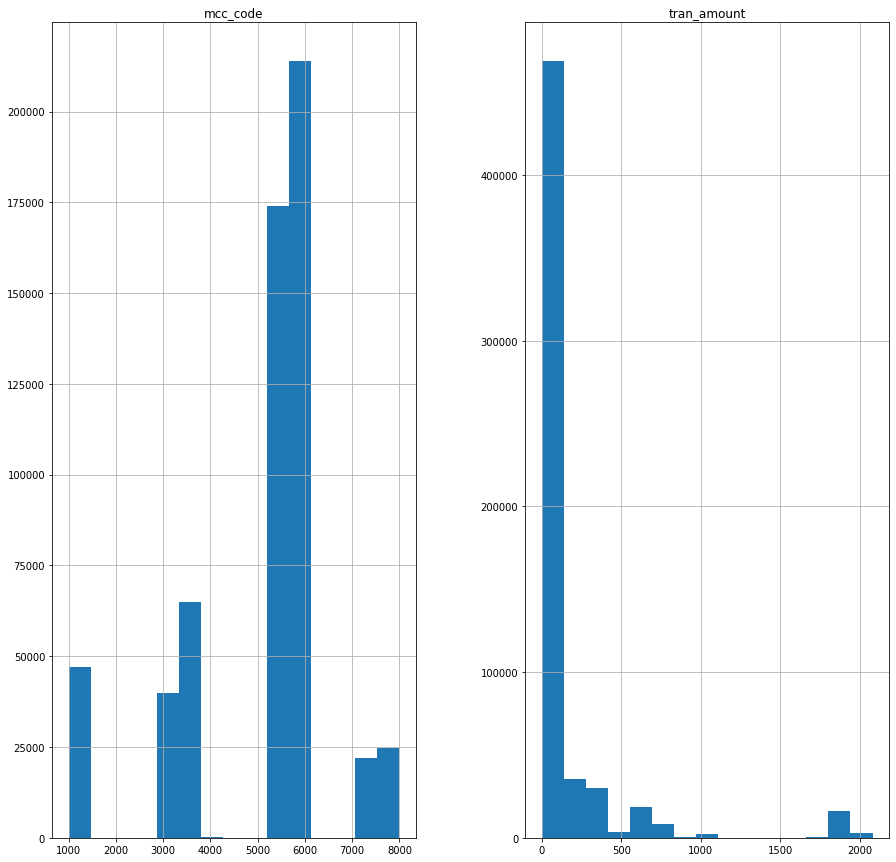

In [78]:
#histogram plots 
creditcleansed.hist(figsize=(15,15),bins=15)
plt.show()

In [79]:
creditcleansed.dtypes

customer_id                   object
tran_date                     object
tran_amount                  float64
merchant_name                 object
merchant_name_semicleaned     object
merchant_name_new             object
merchant_country              object
merchant_city                 object
mcc_code                       int64
card_id                       object
tran_category                 object
behav_category                object
top90_flag                    object
created_date                  object
behav_type                    object
dtype: object

In [80]:
creditcleansed.describe()

,tran_amount,mcc_code
count,586585.000000,586585.000000
mean,174.916216,5018.092592
std,357.388186,1617.355247
min,0.000000,1001.000000
25%,30.000000,3767.000000
50%,54.230000,5499.000000
75%,121.760000,5813.000000
max,2082.000000,7999.000000


In [81]:
creditcleansed[['customer_id', 'tran_date', 'tran_amount', 'merchant_name', 'merchant_name_semicleaned', 'merchant_name_new', 'merchant_country', 'merchant_city', 'mcc_code', 'card_id', 'tran_category', 'behav_category', 'top90_flag', 'created_date', 'behav_type']].nunique()

customer_id                  9000
tran_date                     356
tran_amount                  3041
merchant_name                8816
merchant_name_semicleaned    8816
merchant_name_new            8536
merchant_country                1
merchant_city                 177
mcc_code                      177
card_id                      9000
tran_category                   7
behav_category                  7
top90_flag                      2
created_date                    1
behav_type                      1
dtype: int64

Text(0.5, 1, 'Correlation Matrix')

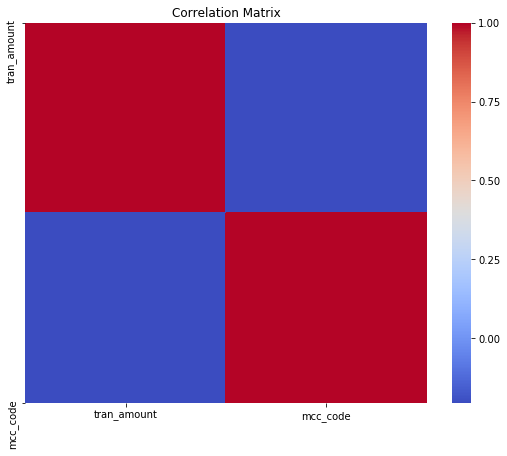

In [82]:
plt.figure(figsize=(9,7))
sns.heatmap(creditcleansed.corr(),cmap='coolwarm')

plt.title('Correlation Matrix')

In [17]:
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

customers = pd.read_csv('customer_demographics.csv')

customers.head()

,customer_id,customer_from,zipcode,vintage_group,card_type,phone_number,credit_limit,crayon_cust_id,email_flag,num_tran,...,cr_lim_group,customer_tags,salary_bin,email,customer_city,geocode,sms_flag,customer_segment,customer_id_new,customer_uid
0,000caac6-9b6b-4a2e-81db-8cd765676a71,NaN,NaN,NaN,PLATINUM,NaN,NaN,NaN,NaN,NaN,...,5000,NaN,NaN,NaN,Thane,NaN,NaN,NaN,10000196,3471a27c-9b30-4bd8-8921-d2ac4c755ebd
1,004a839c-dff5-4b5e-9aca-c0476f29bc70,NaN,NaN,NaN,WORLD,NaN,NaN,NaN,NaN,NaN,...,5000,NaN,NaN,NaN,New Delhi,NaN,NaN,NaN,10001143,de282b2e-3154-4c67-a938-82b5a44c634a
2,005e35e8-5f4a-466e-8615-99dbf18ed635,NaN,NaN,NaN,PLATINUM,NaN,NaN,NaN,NaN,NaN,...,5000,NaN,NaN,NaN,Kolkata,NaN,NaN,NaN,10001421,c9fd39ea-75b1-4e08-a4d5-c4a66526a966
3,005e4e17-7a23-43e6-aca3-13a3385e090f,NaN,NaN,NaN,GOLD,NaN,NaN,NaN,NaN,NaN,...,7591,NaN,NaN,NaN,Thane,NaN,NaN,NaN,10001422,f78948f3-ed5c-4e76-9288-6ec9f90b005e
4,0066f872-7ed0-4395-aac3-b1c1f65f469e,NaN,NaN,NaN,PLATINUM,NaN,NaN,NaN,NaN,NaN,...,8863,NaN,NaN,NaN,Sharjah,NaN,NaN,NaN,10001567,9c4a996a-64b8-469f-b941-419f686df7c4


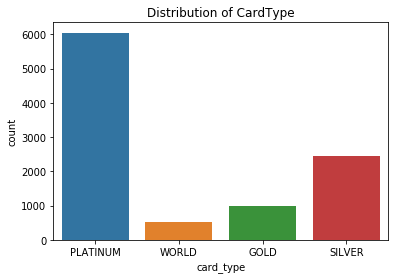

In [25]:
sns.countplot(x='card_type', data=customers);
plt.title('Distribution of CardType');

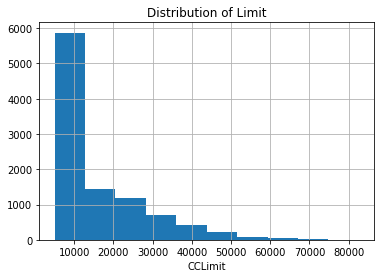

In [26]:
customers.hist('cr_lim_group');
plt.title('Distribution of Limit');
plt.xlabel('CCLimit');

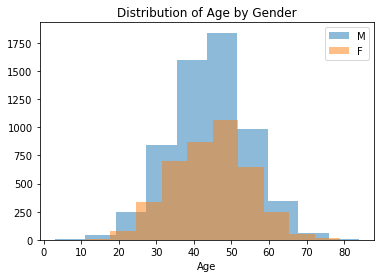

In [30]:
plt.hist('age', data=customers[customers['gender'] == 'M'], alpha=0.5, label='M');
plt.hist('age', data=customers[customers['gender'] == 'F'], alpha=0.5, label='F');
plt.title('Distribution of Age by Gender');
plt.xlabel('Age');
plt.legend();

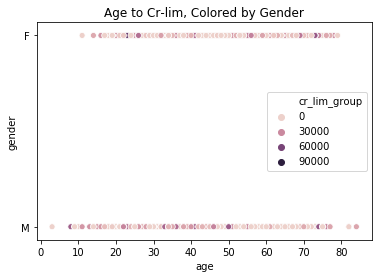

In [32]:
sns.scatterplot('age', 'gender', hue='cr_lim_group', data=customers);
plt.title('Age to Cr-lim, Colored by Gender');

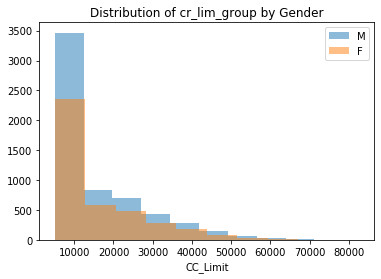

In [34]:
plt.hist('cr_lim_group', data=customers[customers['gender'] == 'M'], alpha=0.5, label='M');
plt.hist('cr_lim_group', data=customers[customers['gender'] == 'F'], alpha=0.5, label='F');
plt.title('Distribution of cr_lim_group by Gender');
plt.xlabel('CC_Limit');
plt.legend();

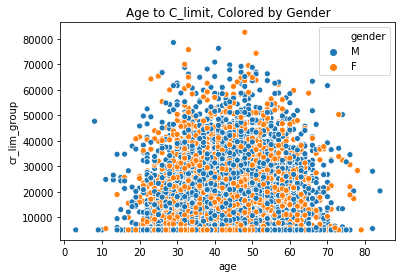

In [35]:
sns.scatterplot('age', 'cr_lim_group', hue='gender', data=customers);
plt.title('Age to C_limit, Colored by Gender');

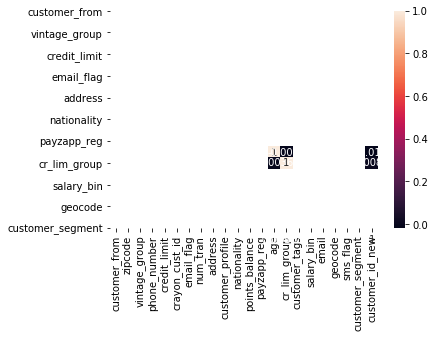

In [36]:
sns.heatmap(customers.corr(), annot=True)